# Shrink Forecasting Using Deep Learning Methodologies
by Milan, Renpin, Krish

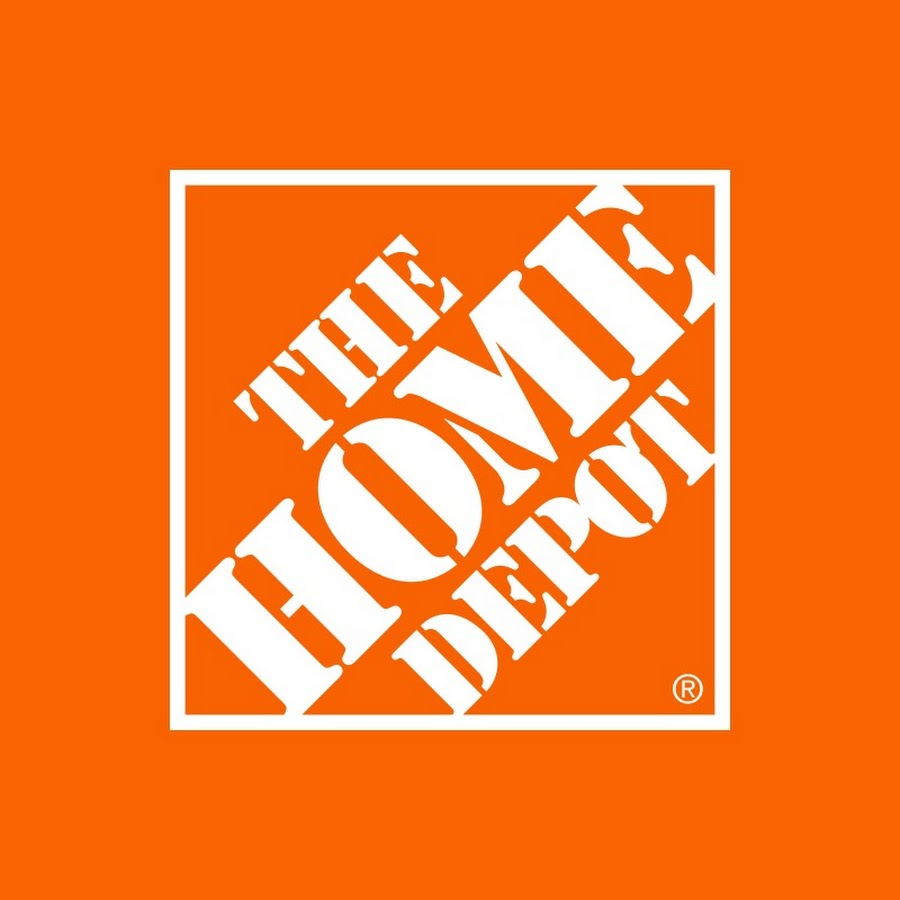

In [ ]:
from IPython.display import Image
Image(filename='LOGO.jpeg')

## #1 Libraries and Utilities

In [1]:
!pip install Plotly
!pip install chart_studio
import pandas as pd
import numpy as np

#Using Plotly for visual graphs, easier to push to web
import chart_studio.plotly as cspy
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot

#Starting with a Data Science Package with sever automated task prior to moving to advancecd deeplearning algorithms 
!pip install pycaret[full]
from pycaret.utils import version
version()


     |████████████████████████████████| 71kB 3.7MB/s 
     |████████████████████████████████| 266kB 6.8MB/s 
     |████████████████████████████████| 256kB 8.2MB/s 
     |████████████████████████████████| 2.0MB 10.0MB/s 
     |████████████████████████████████| 81kB 4.6MB/s 
     |████████████████████████████████| 1.7MB 28.6MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 61kB 6.5MB/s 
     |████████████████████████████████| 6.8MB 35.8MB/s 
     |████████████████████████████████| 276kB 47.3MB/s 
     |████████████████████████████████| 174kB 49.1MB/s 
     |████████████████████████████████| 1.4MB 26.8MB/s 
     |████████████████████████████████| 14.2MB 290kB/s 
     |████████████████████████████████| 112kB 44.6MB/s 
     |████████████████████████████████| 166.7MB 85kB/s 
     |████████████████████████████████| 358kB 42.1MB/s 

'2.3.1'

In [2]:
# Mounting Google Drive

!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [3]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

KeyboardInterrupt: ignored

In [4]:
import detale
import dtale.app as dtale_app

dtale_app.USE_NGROK = True 
df=
dtale.show(df)
d
dtale.instances()
dtale.get_instance(1).kill()

SyntaxError: ignored

# #2 Load and Check Data


In [6]:
#df_MSI52 = pd.read_csv("/content/STR_R52_MSI.csv", header='infer', low_memory=False)
df_MSI52 = pd.read_csv("/content/hd_final_data_516.csv", header='infer', low_memory=False)

print(df_MSI52.shape)
df_MSI52.head()


(98121, 138)


,STR_ALIAS,ty_net_shrink,ty_inv_sls,inv_cnt,cycle_length,FET_FLG,LU_FLG,urban,suburban,rural,rgn_nm,date_snap,fyfw_prd_bgn,fyfw_prd_end,str_fet_wk_cnt,net_sls_amt,net_sls_amt.1,rtn_amt_rt,rtn_trans_rt,mkup_rt,rsn_01_rt,rsn_02_rt,dc_dmg_rt,str_dmg_rt,cust_sat_rt,rsn_06_rt,str_use_rt,rsn_09_rt,rdtag_rt,rsn_12_rt,rsn_15_rt,rsn_18_rt,rsn_22_rt,rsn_23_rt,rsn_24_rt,rsn_25_rt,promo_rt,rsn_30_rt,rsn_33_rt,rsn_40_rt,...,inval_sls_intrvntn_rt,inval_unt_intrvntn_rt,cash_pen,sco_pen,key_sku_rt,qty_key_rt,gen_sku_rt,d90_cash_vs_total,d90_sco_vs_total,d90_cash_vs_main,d90_sco_vs_main,attr_rt,quick_term_rt,avg_tenure,avg_wage,pt_ratio,int_cnt,int_val,ext_cnt,ext_val,known_theft_cnt,known_theft_val,merch_recov_cnt,merch_recov_val,pos_recov_cnt,pos_recov_val,risk_avt_cnt,risk_avt_val,lowes_flag,lowes_cnt,menards_flag,menards_cnt,avg_osha_rt,aci_score,cap_index,online_sat_voc_num,online_sat_voc_den,online_sat_voc_pct,zip_code,shsrink_rate
0,1001,611648.84,32660070.09,3.0,55.0,0.0,1.0,0.0,1.0,0.0,MIDSOUTH,10/2/17,201635,201735,0,556736.78,22038030.28,-0.149609,0.101869,0.009331,0.000324,0.000773,0.000211,0.007403,0.004279,0.000131,0.000503,0.009140,0.001536,0.001531,0.001433,0.000005,0.000058,0.001622,0.000765,0.001998,0.007829,0.003467,-0.000272,0.002294,...,0.318169,0.25065,0.282240,0.110415,0.059294,0.034961,0.000064,0.418338,0.155321,0.729245,0.270755,0.010618,0.208333,5.412885,12.605000,0.633269,2,1844.75,7,7407.0,3,1800.0,18,12339.19,0,0.00,2,814.72,1,5,0,0,0.815405,0,0,164.08,193,0.850155,30096,0.018728
1,1001,611648.84,32660070.09,3.0,55.0,0.0,1.0,0.0,1.0,0.0,MIDSOUTH,10/9/17,201636,201736,0,557228.39,22559095.42,-0.150751,0.101917,0.009346,0.000317,0.000774,0.000221,0.007390,0.004273,0.000128,0.000549,0.009109,0.001554,0.001549,0.001440,0.000005,0.000057,0.001656,0.000755,0.002017,0.007692,0.003403,-0.000282,0.002316,...,0.318169,0.25065,0.282114,0.110415,0.059323,0.034963,0.000069,0.418329,0.155359,0.729192,0.270808,0.010769,0.205479,5.411538,12.604808,0.633269,2,1844.75,7,7407.0,3,1800.0,18,12339.19,0,0.00,2,814.72,1,5,0,0,0.815405,0,0,164.23,193,0.850933,30096,0.018728
2,1001,611648.84,32660070.09,3.0,55.0,0.0,1.0,0.0,1.0,0.0,MIDSOUTH,10/16/17,201637,201737,0,599390.85,23073264.01,-0.151623,0.102010,0.009298,0.000313,0.000762,0.000221,0.007410,0.004266,0.000128,0.000548,0.009008,0.001568,0.001563,0.001447,0.000005,0.000055,0.001655,0.000755,0.002045,0.007553,0.003382,-0.000270,0.002324,...,0.318169,0.25065,0.282093,0.110415,0.059364,0.034979,0.000068,0.419431,0.155190,0.729926,0.270074,0.010324,0.214286,5.407885,12.603462,0.633654,2,1844.75,7,7407.0,2,1042.0,17,11909.38,0,0.00,2,814.72,1,5,0,0,0.815405,0,0,163.67,193,0.848031,30096,0.018728
3,1001,611648.84,32660070.09,3.0,55.0,0.0,1.0,0.0,1.0,0.0,MIDSOUTH,10/23/17,201638,201738,0,549696.03,23634939.47,-0.151075,0.102063,0.009369,0.000319,0.000751,0.000216,0.007434,0.004222,0.000127,0.000549,0.008942,0.001559,0.001554,0.001446,0.000005,0.000072,0.001672,0.000741,0.002087,0.007423,0.003405,-0.000269,0.002325,...,0.318169,0.25065,0.282017,0.110415,0.059451,0.034974,0.000064,0.419698,0.155206,0.730031,0.269969,0.010174,0.217391,5.406538,12.603269,0.634038,2,1844.75,7,7407.0,3,1301.0,18,12106.27,1,239.85,2,814.72,1,5,0,0,0.815405,0,0,162.96,191,0.853194,30096,0.018728
4,1001,611648.84,32660070.09,3.0,55.0,0.0,1.0,0.0,1.0,0.0,MIDSOUTH,10/30/17,201639,201739,0,639228.97,24155476.07,-0.151058,0.102077,0.009518,0.000380,0.000751,0.000220,0.007457,0.004198,0.000124,0.000551,0.008897,0.001535,0.001531,0.001463,0.000004,0.000071,0.001683,0.000735,0.002087,0.007440,0.003440,-0.000265,0.002317,...,0.318169,0.25065,0.282124,0.110415,0.059494,0.034875,0.000061,0.420342,0.156345,0.728891,0.271109,0.010172,0.217391,5.405962,12.603269,0.634038,2,1844.75,7,7407.0,3,1301.0,19,12305.27,1,239.85,2,814.72,1,5,0,0,0.815405,0,0,161.74,189,0.855767,30096,0.018728


In [7]:
df_MSI52.dtypes

STR_ALIAS               int64
ty_net_shrink         float64
ty_inv_sls            float64
inv_cnt               float64
cycle_length          float64
                       ...   
online_sat_voc_num    float64
online_sat_voc_den      int64
online_sat_voc_pct    float64
zip_code                int64
shsrink_rate          float64
Length: 138, dtype: object

In [9]:
df_MSI52 = pd.read_csv("/content/hd_final_data_516.csv", header='infer', low_memory=False, parse_dates = ['date_snap'])

In [10]:
print('Min date from df_MSI52: %s' % df_MSI52['date_snap'].min().date())
print('Max date from df_MSI52: %s' % df_MSI52['date_snap'].max().date())


Min date from df_MSI52: 2017-02-06
Max date from df_MSI52: 2021-03-08


In [ ]:
corr = df_MSI52.corr()
corr.style.background_gradient(cmap='RdBu_r').set_precision(2) #RdBu_r or BrBG or coolwarm


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# See the number of rows and columns
print("Rows, columns: " + str(df_MSI52.shape))

Rows, columns: (98121, 130)


In [ ]:
# I am determined to get this to run...
%reload_ext google.colab.data_table #https://towardsdatascience.com/10-tips-for-a-better-google-colab-experience-33f8fe721b82#8c1e.  trying to get this interactive table to work
display(df_MSI52)

ModuleNotFoundError: ignored

# #3 Descriptive Statistics

In [ ]:
describe = df_MSI52.describe()
describe.T

,count,mean,std,min,25%,50%,75%,max
STR_ALIAS,98121.0,1.995048e+03,5.747997e+02,1001.000000,1.512000e+03,1.985000e+03,2.483000e+03,2.987000e+03
fyfw_prd_bgn,98121.0,2.017717e+05,9.580110e+01,201601.000000,2.017100e+05,2.017460e+05,2.018360e+05,2.020050e+05
fyfw_prd_end,98121.0,2.018714e+05,9.564609e+01,201701.000000,2.018100e+05,2.018460e+05,2.019350e+05,2.021050e+05
str_fet_wk_cnt,98121.0,6.284170e+00,2.000107e+01,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,2.010000e+02
net_sls_amt,98121.0,4.381157e+07,1.850681e+07,852792.260000,3.112561e+07,4.122792e+07,5.383263e+07,1.488730e+08
...,...,...,...,...,...,...,...,...
aci_score,98121.0,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
cap_index,98121.0,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
online_sat_voc_num,98121.0,4.501226e+02,2.466685e+02,1.000000,2.819100e+02,3.954200e+02,5.545700e+02,2.494520e+03
online_sat_voc_den,98121.0,5.411914e+02,3.022886e+02,1.000000,3.360000e+02,4.700000e+02,6.660000e+02,2.787000e+03


In [11]:
df_MSI52.columns

Index(['STR_ALIAS', 'ty_net_shrink', 'ty_inv_sls', 'inv_cnt', 'cycle_length',
       'FET_FLG', 'LU_FLG', 'urban', 'suburban', 'rural',
       ...
       'menards_flag', 'menards_cnt', 'avg_osha_rt', 'aci_score', 'cap_index',
       'online_sat_voc_num', 'online_sat_voc_den', 'online_sat_voc_pct',
       'zip_code', 'shsrink_rate'],
      dtype='object', length=138)

# #4 Missing Values

In [12]:
df_MSI52.isnull().sum()


STR_ALIAS               0
ty_net_shrink         912
ty_inv_sls            912
inv_cnt               912
cycle_length          912
                     ... 
online_sat_voc_num      0
online_sat_voc_den      0
online_sat_voc_pct      0
zip_code                0
shsrink_rate          912
Length: 138, dtype: int64

## #5 Exploratory Data Analysis

In [25]:
# To explore the time series data first we need to aggregate the sales by day
daily_sales = df_MSI52.groupby('date_snap', as_index=False)['net_sls_amt'].sum()
store_daily_sales = df_MSI52.groupby(['STR_ALIAS', 'date_snap'], as_index=False)['net_sls_amt'].sum()
region_daily_sales = df_MSI52.groupby(['rgn_nm', 'date_snap'], as_index=False)['net_sls_amt'].sum()
region_daily_shrinking_rate = df_MSI52.groupby(['rgn_nm', 'date_snap'], as_index=False)['shsrink_rate'].mean()


#item_daily_sales = df_MSI52.groupby(['sku_nbr', 'date_snap'], as_index=False)['net_sls_amt'].sum()


In [26]:
region_daily_shrinking_rate.head()

,rgn_nm,date_snap,shsrink_rate
0,CENTRAL,2017-02-06,0.011627
1,CENTRAL,2017-02-13,0.011439
2,CENTRAL,2017-02-20,0.013945
3,CENTRAL,2017-02-27,0.012403
4,CENTRAL,2017-03-06,0.012403


In [14]:
# Overall daily sales
daily_sales_sc = go.Scatter(x=daily_sales['date_snap'], y=daily_sales['net_sls_amt'])
layout = go.Layout(title='Daily sales', xaxis=dict(title='Date'), yaxis=dict(title='net_sls_amt'))
fig = go.Figure(data=[daily_sales_sc], layout=layout)
iplot(fig)

In [ ]:
# Daily sales by store
store_daily_sales_sc = []
for store in store_daily_sales['STR_ALIAS'].unique():
    current_store_daily_sales = store_daily_sales[(store_daily_sales['STR_ALIAS'] == store)]
    store_daily_sales_sc.append(go.Scatter(x=current_store_daily_sales['date_snap'], y=current_store_daily_sales['net_sls_amt'], name=('Store %s' % store)))

layout = go.Layout(title='Store daily sales', xaxis=dict(title='Date'), yaxis=dict(title='Sales'))
fig = go.Figure(data=store_daily_sales_sc, layout=layout)
iplot(fig)

Output hidden; open in https://colab.research.google.com to view.

In [23]:
# Daily sales by region
region_daily_sales_sc = []
for region in region_daily_sales['rgn_nm'].unique():
    current_region_daily_sales = region_daily_sales[(region_daily_sales['rgn_nm'] == region)]
    region_daily_sales_sc.append(go.Scatter(x=current_region_daily_sales['date_snap'], y=current_region_daily_sales['net_sls_amt'], name=('%s' % region)))

layout = go.Layout(title='Region daily sales', xaxis=dict(title='Date'), yaxis=dict(title='Sales'))
fig = go.Figure(data=region_daily_sales_sc, layout=layout)
iplot(fig)

In [27]:
# Daily shrinking rate by region
region_daily_shrink_sc = []
for region in region_daily_shrinking_rate['rgn_nm'].unique():
    current_region_daily_shrink = region_daily_shrinking_rate[(region_daily_shrinking_rate['rgn_nm'] == region)]
    region_daily_shrink_sc.append(go.Scatter(x=current_region_daily_shrink['date_snap'], y=current_region_daily_shrink['shsrink_rate'], name=('%s' % region)))

layout = go.Layout(title='Region daily shrinking rate', xaxis=dict(title='Date'), yaxis=dict(title='rate'))
fig = go.Figure(data=region_daily_shrink_sc, layout=layout)
iplot(fig)

# #6 Outlier Detection

# Data Science with Pycaret

In [ ]:
# Just playing around...   chrome-extension://jaekigmcljkkalnicnjoafgfjoefkpeg/suspended.html#ttl=(2)%20Moez%20Ali%2C%20Founder%20%26%20Principal%20Author%20of%20PyCaret-%20Machine%20Learning%20with%20PyCaret%20-%20YouTube&pos=119&uri=https://www.youtube.com/watch?v=QDME8SDT7gc&t=881s
from pycaret.regression import *
s = setup(df_MSI52, target = '')

# #7 Feature Engineering

# #8 Preprocessing

# #9 Models